In [2]:
import os, gc, torch, PIL, pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from models.load import TrainedModels
## Suppress the assignement warning from pandas.
pd.options.mode.chained_assignment = None  # default='warn

## Supress user warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

In [3]:
XAMI_MIMIC_PATH = "D:\XAMI-MIMIC"

In [4]:
from models.load import TrainedModels

def plot_iou_result(suffix, disease="all", thrs = 0.5):

    all_models_eval_data = {}
    for select_model in TrainedModels:
        with open(
            os.path.join(
                "eval_results",
                f"{select_model.value}_{suffix}_{disease}.pkl",
            ),
            "rb",
        ) as f:
            eval_data = pickle.load(f)
            all_models_eval_data[select_model.value] = eval_data


    fig, (precision_ax, recall_ax) = plt.subplots(
        2, figsize=(10, 10), dpi=80, sharex=True,
    )

    fig.suptitle(f"{suffix}")

    display(
        pd.DataFrame(
            [
                {
                    "model": str(select_model).split(".")[-1],
                    **all_models_eval_data[select_model.value][thrs][0],
                } for select_model in TrainedModels
            ]
        )
    )

    precision_ax.set_title("Average Precision")

    for select_model in TrainedModels:
        precision_ax.plot(
            all_models_eval_data[select_model.value].keys(),
            [v[0]["ap"] for v in all_models_eval_data[select_model.value].values()],
            marker="o",
            label=str(select_model).split(".")[-1],
            # color="darkorange",
        )
    precision_ax.legend(loc="upper right")

    recall_ax.set_title("Average Recall")
    for select_model in TrainedModels:
        recall_ax.plot(
            all_models_eval_data[select_model.value].keys(),
            [v[0]["ar"] for v in all_models_eval_data[select_model.value].values()],
            marker="o",
            label=str(select_model).split(".")[-1],
            # color="darkorange",
        )

    recall_ax.legend(loc="upper right")
    recall_ax.set_xlabel("IoBB")

    plt.plot()
    plt.pause(0.01)

    return fig

,model,ar,ap
0,original,0.672219,0.387843
1,custom_without_clinical,0.580181,0.352986
2,custom_with_clinical_drop0,0.677188,0.362950
3,custom_with_clinical_drop2,0.621457,0.324510
4,custom_with_clinical_drop3,0.536307,0.303925
5,custom_with_clinical_drop5,0.681592,0.393824


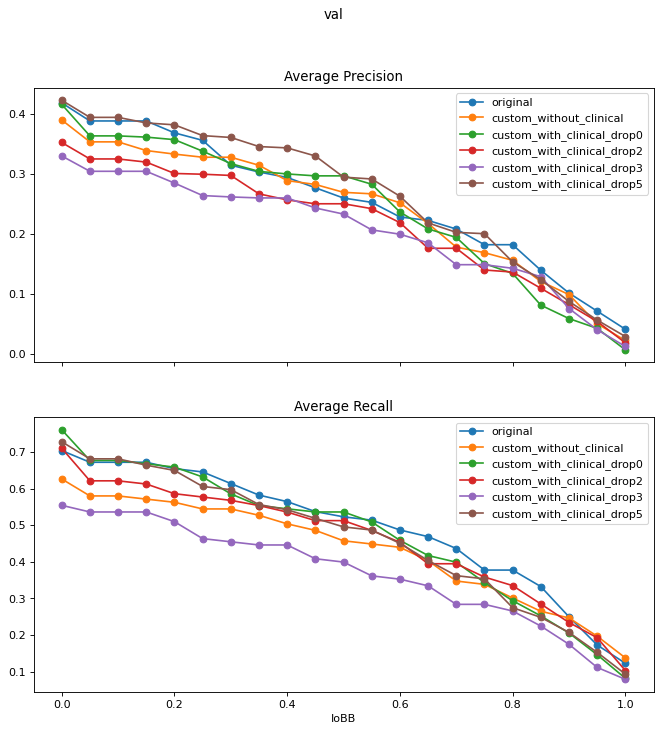

In [7]:
_ = plot_iou_result("val", thrs=0.05)

,model,ar,ap
0,original,0.260324,0.065996
1,custom_without_clinical,0.307669,0.120631
2,custom_with_clinical_drop0,0.280894,0.055969
3,custom_with_clinical_drop2,0.227094,0.056799
4,custom_with_clinical_drop3,0.207154,0.051218
5,custom_with_clinical_drop5,0.282514,0.089141


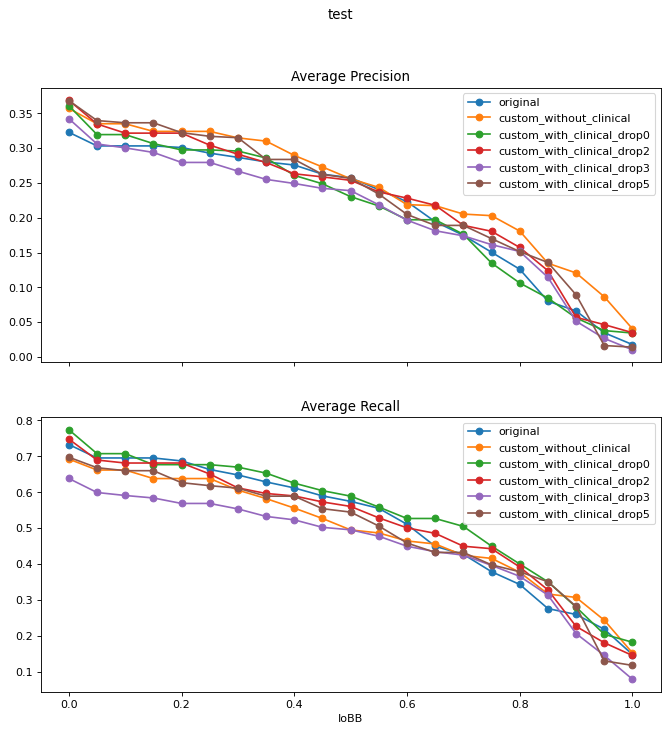

In [21]:
_ = plot_iou_result("test", thrs=0.9)


,model,ar,ap
0,original,0.323016,0.254994
1,custom_without_clinical,0.350000,0.231064
2,custom_with_clinical_drop0,0.338889,0.204160
3,custom_with_clinical_drop2,0.325794,0.269161
4,custom_with_clinical_drop3,0.282540,0.201533
5,custom_with_clinical_drop5,0.317857,0.235755


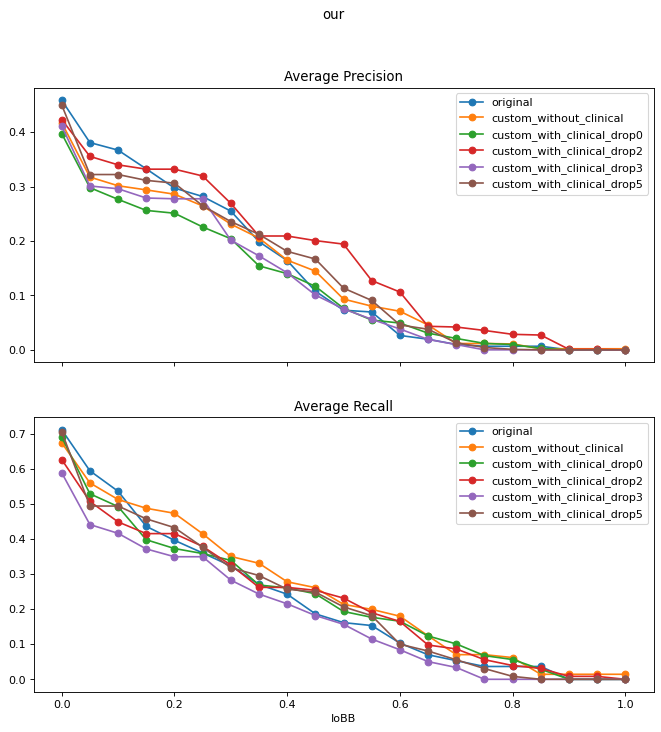

In [10]:
_ = plot_iou_result("our", thrs=0.3)